# Predicting sport specific performance from field testing in Hockey

par Kevin Aizen (https://github.com/KevinAizen/Hockey-testing/blob/master/machine_learning/QJMHL.ipynb)

In [17]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid", context="paper")

# Output will be stable
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [18]:
import altair as alt
alt.data_transformers.enable("json")

DataTransformerRegistry.enable('json')

## Get the data

### 1) Features X

In [19]:
os.chdir('/Users/kevinaizen/PycharmProjects/analysis_groinbar/results/')

X = pd.read_excel('X.xlsx')
#X.drop(
#    columns='Position',
#    inplace=True, 
#)
X = X.iloc[:, 1:]
y = pd.read_excel('y.xlsx')

GroinBar = [
    "AD",
    "imb_AD",
    "AB",
    "imb_AB",
    "IR",
    "imb_IR",
    "ER",
    "imb_ER",
    "Flexion",
    "imb_Flexion",
    "Extension",
    "imb_Extension"
]

#GroinBar = [
#    "AD",
#    "AB",
#    "Flexion",
#]

X_var1 = [
    "Vertical Jump",
    "20 M Sprint",
    "Wingate w/kg",
    "AD",
    "AB",
    "Flexion"
]
X['Height'] = X['Height']/100
#X = X[X_var1]

X.head()

,Position,Height,Weight,Broad Jump,Vertical Jump,20 M Sprint,Wingate w/kg,AD,imb_AD,AB,imb_AB,IR,imb_IR,ER,imb_ER,Flexion,imb_Flexion,Extension,imb_Extension
0,DEFENSE,1.8288,78.545455,248.92,27.0,3.091,9.690,358.505991,6.343434,366.311872,1.891034,152.689994,6.910402,168.446370,2.198955,286.071428,8.660065,225.710406,10.615528
1,DEFENSE,1.8288,74.272727,251.46,22.0,3.208,9.460,361.427620,7.107222,484.011684,3.038075,135.187558,2.023079,89.356616,8.422306,287.811026,26.748566,271.777537,71.487035
2,FORWARD,1.5494,77.181818,215.90,22.5,3.196,9.020,NaN,NaN,NaN,NaN,96.266629,18.324619,120.606410,14.073297,249.787358,11.513466,226.592032,29.255798
3,FORWARD,1.6510,50.454545,231.14,21.5,3.057,8.668,225.688366,0.772589,329.842719,2.861226,121.486929,3.629044,96.390217,0.938397,218.745021,18.501706,191.082618,26.706001
4,FORWARD,1.7272,78.863636,213.36,23.0,3.055,10.090,289.540041,3.642581,233.076370,7.541929,154.297173,5.196052,138.848352,1.019193,313.006867,16.102219,209.380687,9.512702


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 19 columns):
Position         93 non-null object
Height           93 non-null float64
Weight           93 non-null float64
Broad Jump       93 non-null float64
Vertical Jump    93 non-null float64
20 M Sprint      93 non-null float64
Wingate w/kg     93 non-null float64
AD               80 non-null float64
imb_AD           80 non-null float64
AB               80 non-null float64
imb_AB           80 non-null float64
IR               80 non-null float64
imb_IR           80 non-null float64
ER               80 non-null float64
imb_ER           80 non-null float64
Flexion          82 non-null float64
imb_Flexion      82 non-null float64
Extension        78 non-null float64
imb_Extension    78 non-null float64
dtypes: float64(18), object(1)
memory usage: 13.9+ KB


In [21]:
X['Position'].value_counts()

FORWARD    64
DEFENSE    29
Name: Position, dtype: int64

#### 1) a) Descriptives statistics

In [23]:
X.describe()

,Height,Weight,Broad Jump,Vertical Jump,20 M Sprint,Wingate w/kg,AD,imb_AD,AB,imb_AB,IR,imb_IR,ER,imb_ER,Flexion,imb_Flexion,Extension,imb_Extension
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,82.000000,82.000000,78.000000,78.000000
mean,1.761340,75.016618,264.870108,23.801075,3.173495,9.231075,313.057927,5.288972,336.261466,5.553330,127.566280,7.176450,124.968003,10.931212,233.248415,11.875909,218.248184,23.274284
std,0.098694,8.375804,69.955201,2.459608,0.134839,1.240969,62.515436,4.059572,82.570686,4.599979,27.084955,6.306323,41.799991,12.410711,57.085644,10.134187,60.025756,22.805858
min,1.549400,50.454545,185.420000,17.000000,2.884000,2.904000,183.753521,0.004686,182.260976,0.235488,34.359691,0.365006,14.657605,0.096375,133.878063,0.007393,95.364185,0.303161
25%,1.727200,70.590909,231.140000,22.000000,3.089000,8.668000,260.090935,2.203779,280.011689,2.184926,114.163092,2.377018,96.097220,2.850113,190.747526,4.624296,182.826810,9.382030
50%,1.803400,75.681818,243.840000,23.500000,3.159000,9.328000,317.635293,4.778500,330.348085,4.382243,129.575170,5.146215,122.316805,7.453374,223.796230,10.197578,213.708446,16.909261
75%,1.828800,78.954545,256.540000,25.500000,3.257000,9.900000,359.813628,7.300542,389.308943,7.304732,148.201150,10.944408,144.515244,14.189117,269.392430,15.918334,260.430647,31.284240
max,1.955800,98.681818,505.460000,30.000000,3.639000,12.320000,449.208977,20.017129,548.550163,20.230230,188.450904,29.090003,260.898543,65.462178,388.785125,50.006826,382.929898,160.199952


#### 1) b) Distribution

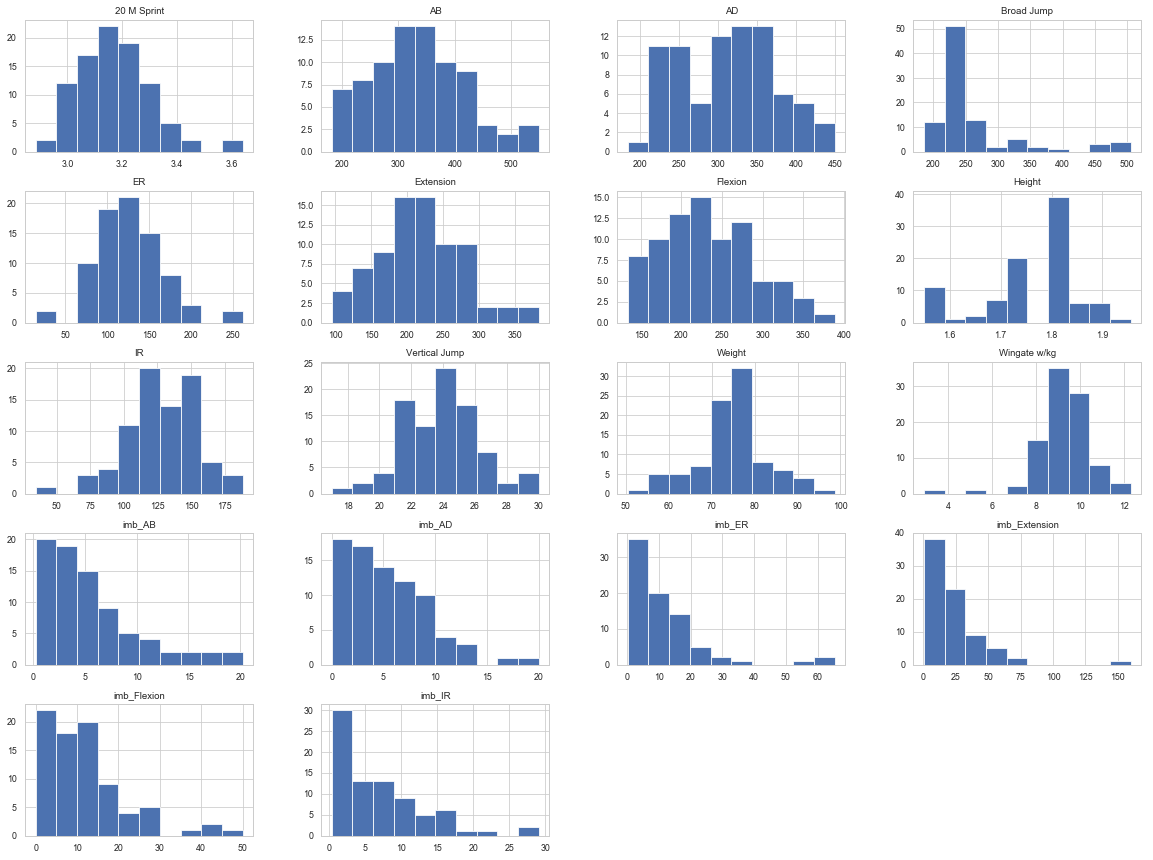

In [27]:
X.hist(bins=10, figsize=(20,15))
plt.show()

### 2) Target y

In [28]:
y = y.iloc[:, 1:]
target = y.columns.tolist()
y.head()

,5F,5_30F,30F,5VF,5_30VF,30VF,5B,5_30B,30B,5VB,30VB,5_30VB
0,1.185,3.234,4.419,4.219409,7.730365,6.788866,1.367,3.907,5.274,3.657644,5.688282,6.398771
1,0.944,3.260,4.204,5.296610,7.668712,7.136061,1.117,3.993,5.110,4.476276,5.870841,6.260957
2,1.259,3.301,4.560,3.971406,7.573463,6.578947,1.430,4.516,5.946,3.496503,5.045409,5.535872
3,1.257,3.442,4.699,3.977725,7.263219,6.384337,1.266,4.201,5.467,3.949447,5.487470,5.950964
4,1.162,3.354,4.516,4.302926,7.453787,6.643047,1.374,4.143,5.517,3.639010,5.437738,6.034275


In [30]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
5F        93 non-null float64
5_30F     93 non-null float64
30F       93 non-null float64
5VF       93 non-null float64
5_30VF    93 non-null float64
30VF      93 non-null float64
5B        93 non-null float64
5_30B     93 non-null float64
30B       93 non-null float64
5VB       93 non-null float64
30VB      93 non-null float64
5_30VB    93 non-null float64
dtypes: float64(12)
memory usage: 8.8 KB


#### 2) a) Descriptives statistics

In [31]:
y.describe()

,5F,5_30F,30F,5VF,5_30VF,30VF,5B,5_30B,30B,5VB,30VB,5_30VB
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,1.175581,3.282258,4.457839,4.281253,7.634236,6.737376,1.344226,4.024570,5.368796,3.745906,5.607318,6.250964
std,0.093034,0.159449,0.151307,0.360635,0.365598,0.228329,0.116449,0.324104,0.322437,0.309889,0.328494,0.493510
min,0.907000,2.940000,4.119000,3.599712,6.786102,6.085193,1.117000,3.410000,4.818000,2.742732,4.718465,4.971167
25%,1.128000,3.179000,4.369000,4.006410,7.438262,6.573181,1.266000,3.800000,5.128000,3.563792,5.332385,5.914360
50%,1.177000,3.272000,4.452000,4.248088,7.640587,6.738544,1.337000,3.972000,5.283000,3.739716,5.678592,6.294058
75%,1.248000,3.361000,4.564000,4.432624,7.864108,6.866560,1.403000,4.227000,5.626000,3.949447,5.850234,6.578947
max,1.389000,3.684000,4.930000,5.512679,8.503401,7.283321,1.823000,5.029000,6.358000,4.476276,6.226650,7.331378


#### 2) b) Distribution

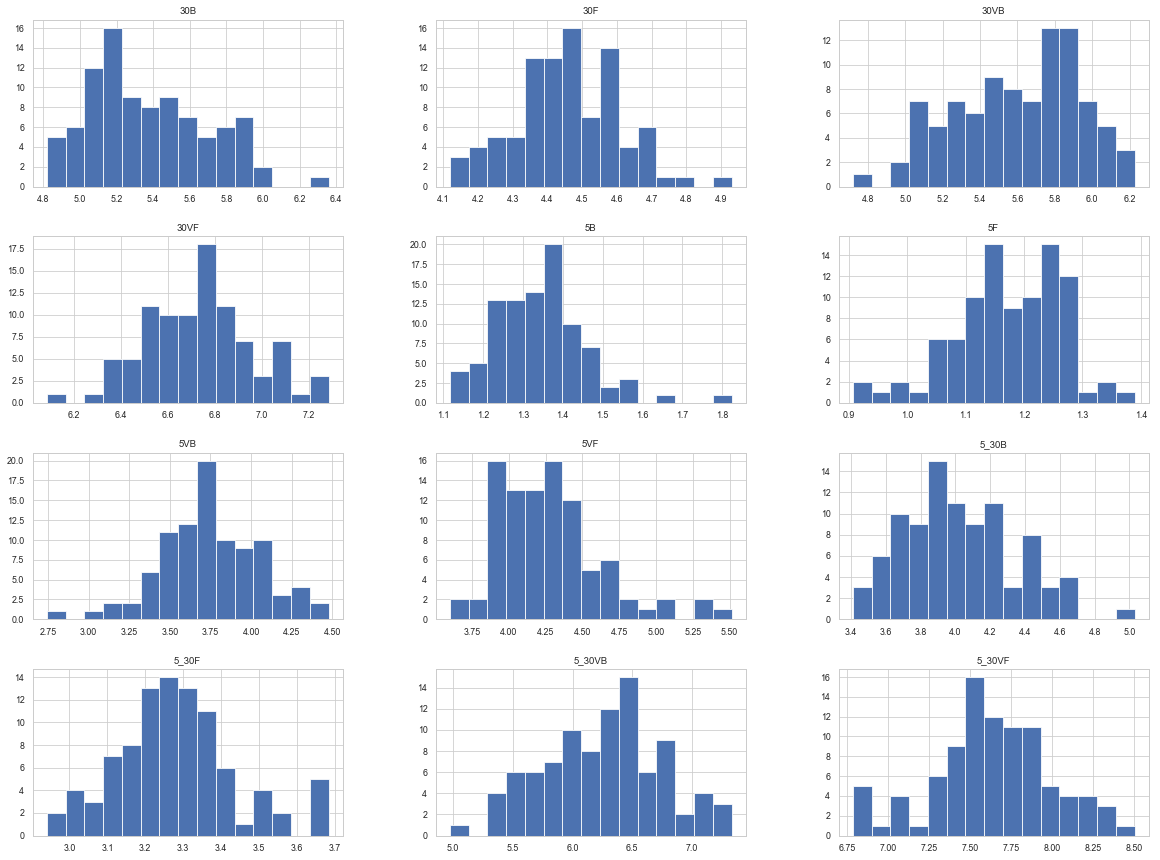

In [34]:
y.hist(bins=15, figsize=(20, 15))
plt.show()